# Tarea 1

**Envío del PR inicial:** viernes 21 de septiembre

**Aceptación del PR:** martes 25 de septiembre

## 1

Consideren el mapeo $F(x) = x^2-2$ definido en el intervalo $[-2,2]$. 

- ¿Qué podemos concluir después de muchos iterados para las condiciones iniciales $x_0=0$, $x_0=0.1$, $x_0=0.001$?
    
- ¿Qué propiedad hace que el interés en este mapeo sea el intervalo [-2,2]?


Para facilitar las cosas, conviene definir una función que simplifique el tomar los iterados de una función:

In [1]:
"""
    iteraciones(f::Function, número_iteraciones::Int, x0)

Genera un array unidimensional de tamaño `1 + número_iteraciones` que en la entrada ``i + 1`` tiene al elemento proveniente de iterar `x0` ``ì`` veces con la función `f`. En el caso de ```i = 1``, el valor en el array es igual a la condición inicial usada.

# Argumentos

Requiere:

+ `f`, una función,
+ `número_iteraciones`, un entero que dicta el número de iteraciones a realizar, y,
+ `x0`, el punto inicial.

En particular, la condición inicial suministrada `x0` es convertida a su respectivo flotante antes de calcular los iterados; esto para facilitar el uso de arrays: es necesario que la función que se itera admita valores flotantes o estructuras con valores flotantes.

# Ejemplo
```julia-repl

julia> iteraciones(x->x^2, 5, 2)
6-element Array{Int64,1}:
          2
          4
         16
        256
      65536
 4294967296

julia> v = x -> [x[1] - x[2], x[1]*x[2]]; iteraciones(v, 2, [1, 3])
3-element Array{Array{Float64,1},1}:
 [1.0, 3.0]  
 [-2.0, 3.0] 
 [-5.0, -6.0]
```
"""
function iteraciones(f::Function, número_iteraciones::Int, x0)
    
    valor = float.(x0)
    
    iterados = [valor]
    
    for i in 1:número_iteraciones
        
        valor = f(valor)
        push!(iterados, valor)
    end
    
    return(iterados)
end

iteraciones

Así como eventualmente el valor de la iteración correspondiente:

In [2]:
"""
    iterar(f::Function, número_iteraciones::Int, x0)

Devuelve el resultado de iterar `número_iteraciones` veces la función `f` con condición inicial `x0`.

# Argumentos

Requiere:

+ `f`, una función,
+ `número_iteraciones`, un entero que dicta el número de iteraciones a realizar, y,
+ `x0`, el punto inicial.

En particular, la condición inicial suministrada `x0` es convertida a su respectivo flotante antes de calcular los iterados; esto para facilitar el uso de arrays: es necesario que la función que se itera admita valores flotantes o estructuras con valores flotantes.

# Ejemplo
```julia-repl

julia> iterar(x->x^2, 5, 2)
4294967296

julia> v = x -> [x[1] - x[2], x[1]*x[2]]; iterar(v, 2, [1, 3])
2-element Array{Float64,1}:
 -5.0
 -6.0
```
"""
function iterar(f::Function, número_iteraciones::Int, x0)
    
    iterados = iteraciones(f, número_iteraciones, x0)
    valor = last(iterados)
    
    return(valor)
end

iterar

Para la función $ F(x) = x^2 - 2 $, consideremos el resultado de iterar $F$ 1000 veces en las condiciones iniciales dadas:

+ Para $x_0 = 0$:

In [3]:
F(x) = x^2 - 2

x0 = 0
número_iteraciones = 1000

iteraciones_F_1 = iteraciones(F, número_iteraciones, x0)

1001-element Array{Float64,1}:
  0.0
 -2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  ⋮  
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0
  2.0

Entonces, $x_0 = 0$ es un punto cuya órbita eventualmente es periódica. Más aún, su órbita converge a una órbita de periodo uno, lo que indica que la órbita converge a un punto fijo: $x = 2$.

+ Para $x_0 = 0.1$:

In [4]:
x0 = 0.1
iteraciones_F_2 = iteraciones(F, número_iteraciones, x0)

1001-element Array{Float64,1}:
  0.1                
 -1.99               
  1.9601000000000002 
  1.8419920100000007 
  1.3929345649038427 
 -0.05973329789614246
 -1.9964319331224507 
  1.9857404635910454 
  1.9431651887427797 
  1.7758909507417626 
  1.1537886689264814 
 -0.6687717074568584 
 -1.5527444033052382 
  ⋮                  
 -0.3682674012305529 
 -1.8643791211908949 
  1.4759095075325335 
  0.17830887442492527
 -1.9682059453013163 
  1.8738346431194484 
  1.5112562697545906 
  0.28389551287255976
 -1.9194033377708262 
  1.6841091730457882 
  0.8362237067369684 
 -1.3007299122910845 

No se observa ningún tipo de patrón evidente, aunque una mejor forma de investigar esto es realizando una gráfica:

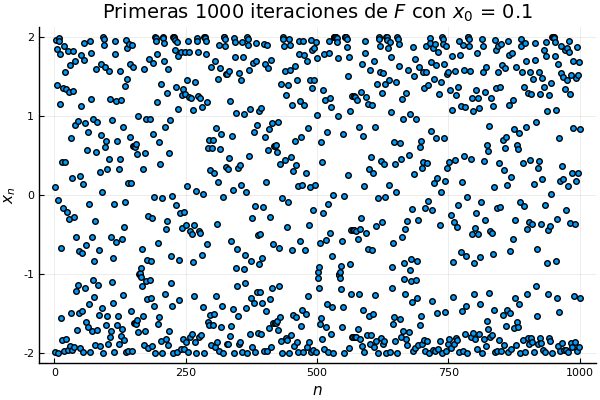

In [5]:
using Plots
using LaTeXStrings
pyplot()

scatter(iteraciones_F_2, key = false, xlabel = L"n", ylabel = L"x_n", title = LaTeXString("Primeras 1000 iteraciones de \$F\$ con \$x_0\$ = $x0"))

No se observa periodicidad ni convergencia, aunque se nota que todos los valores resultantes están en el intervalo [-2, 2].

+ Para $x_0 = 0.001$:

In [6]:
x0 = 0.001
iteraciones_F_3 = iteraciones(F, número_iteraciones, x0)

1001-element Array{Float64,1}:
  0.001              
 -1.999999           
  1.9999960000010004 
  1.9999840000200018 
  1.9999360003360063 
  1.999744005439982  
  1.9989760872931428 
  1.9959053975698025 
  1.9836383560482713 
  1.9348211275858884 
  1.7435327957527287 
  1.0399066098653265 
 -0.9185942427584037 
  ⋮                  
  1.996506616727705  
  1.986038670637507  
  1.944349601267596  
  1.7804953719494598 
  1.1701637695334455 
 -0.6307167524712776 
 -1.6021963781520852 
  0.5670332341636595 
 -1.6784733113539005 
  0.8172726569273281 
 -1.332065404238946  
 -0.22560175882973366

Tampoco se observa ningún tipo de patrón evidente, aunque conviene realizar el mismo tipo de análisis gráfico anterior:

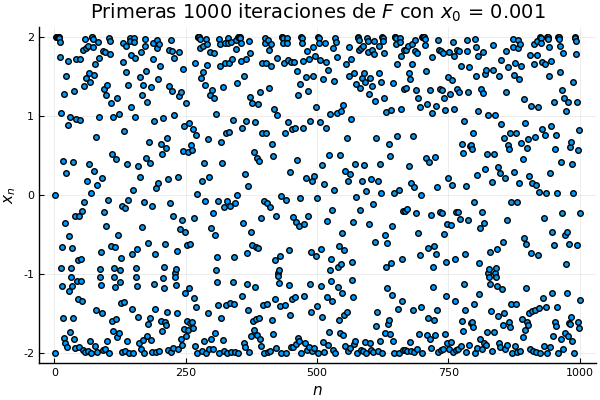

In [7]:
scatter(iteraciones_F_3, key = false, xlabel = L"n", ylabel = L"x_n", title = LaTeXString("Primeras 1000 iteraciones de \$F\$ con \$x_0\$ = $x0"))

Tampoco se observa periodicidad ni convergencia, aunque de nuevo todos los valores resultantes están en el intervalo [-2, 2].

Como se pudo observar en los ejemplos, existió un punto cuya órbita fue eventualmente periódica y otros dos cuyas órbitas no tienen algún comportamiento de convergencia o periodicidad aparente. Sin embargo, en todos los casos el valor de las iteraciones permanece dentro del intervalo [-2, 2]. Esta cota puede explicarse por lo siguiente:

Sea $ x \in [-2, 2]$, entonces $x^2 \in [0, 4] \implies F(x) = x^2 -2 \in [-2, 2] $. 

Esto quiere decir que todas las condiciones iniciales tomadas en el intervalo [-2, 2] son mapeadas al mismo intervalo con la función $F$. Esto, considerando los ejemplos anteriores, nos indica que hay mapeos cuyas iteraciones contienen puntos que generan órbitas que no son periódicas o eventualmente periódicas pero acotadas.

## 2

Escriban una función cuyos argumentos son la función `F` del mapeo, `x0`, la condición inicial, y `n` el número de iterados del mapeo (un número entero), que genere los `n` iterados del mapeo y haga el análisis gráfico descrito del mapeo. Ilustren el funcionamiento con $F(x)=\sqrt{x}$.

¿Qué pueden concluir de iterar *muchas* veces una condición inicial?

Una forma sencilla de implementar lo solicitado es generalizando el código del [notebook de clase](https://github.com/lbenet/TSFisComp1/blob/master/notas_clase/04_Mapeos1d.ipynb):

In [8]:
"""
    análisis_gráfico(f::Function, número_iteraciones::Int, x0::Array{N, 1}, a::Real, b::Real, paso::Real, c::Real, d::Real; title::String = "", ylabel::String = "\$f(x)\$", colores::Array) where N <: Real

Genera un análisis gráfico de los iterados de la función `f` por el `número_iteraciones` dado con condiciones iniciales iguales a las entradas del vector `x0`. La ventana de graficación usada está dada por `` [a, b]\\times[c, d] ``. Para graficar la función, se usan puntos de muestreo separados por `paso` en el intervalo `` [a,b] ``. El título y el título del eje para los iterados se pueden cambiar usando los mismos argumentos que en `Plots.jl`. Los colores de las líneas para los iterados se deben suministrar como un array de colores al keyword argument `colores`.

# Argumentos

Requiere:

+ `f`, una función,
+ `número_iteraciones`, un entero que dicta el número de iteraciones a realizar,
+ `x0`, el array de puntos iniciales usado,
+ `a`, `b`, `c` y `d`, los parámetros usados para establecer la ventana de visualización, y,
+ `colores`, el array de colores para las líneas de los iterados.

En particular, las condiciones iniciales suministradas (las componentes de `x0`) son convertidas a sus respectivos flotantes antes de calcular los iterados; esto para facilitar el uso de arrays: es necesario que la función que se itera admita valores flotantes o estructuras con valores flotantes.

Opcionalmente se pueden especificar:

+ `title`, el título de la gráfica mediante un string, y,
+ `ylabel`, el título del eje y mediante un string.

En particular, `title` y `ylabel` son interpretados como strings con ecuaciones escritas en  `` \\LaTeX `` mediante el comando `LaTeXString`. Esto quiere decir que el texto no es interpretado dentro del entorno matemático de  `` \\LaTeX `` sin incluirlo entre pares de  `` \\ \$ `` (signos de dinero escapados).

# Ejemplo

Para visualizar los primeros cinco iterados de la función `` x \\mapsto \\sqrt{x} `` en la ventana `` [0, 1] \\times [0,1] `` con la función graficada con una resolución de paso igual a 0.01 con condición inicial 0.5 se puede usar el comando:
```julia-repl

julia> análisis_gráfico(x->sqrt(x), 5, [0.5], 0, 1, 0.01, 0, 1, colores = [:green])
```

Para hacer lo mismo, pero cambiando el título a "Ejemplo", el título del eje y a "Eje y" y agregando los iterados correspondientes a la condición inicial igual a 0.7 en color rojo se puede usar:
```julia-repl

julia> análisis_gráfico(x->sqrt(x), 5, [0.5, 0.7], 0, 1, 0.01, 0, 1, title = "Ejemplo", ylabel = "Eje y", colores = [:green, :red])
```
"""
function análisis_gráfico(f::Function, número_iteraciones::Int, x0::Array{N, 1}, a::Real, b::Real, paso::Real, c::Real, d::Real; title::String = "", ylabel::String = "\$f(x)\$", colors::Array) where N <: Real

    #Convirtiendo los elementos de los puntos muestra a flotantes:
    a = float(a)
    b = float(b)
    paso = float(paso)

    #Generando la gráfica de la función:
    rango_x = a:paso:b
    
    título = LaTeXString(title)
    leyenda_y = LaTeXString(ylabel)
    
    gráfica = plot(rango_x, f, 
        xaxis = (L"x", (a, b)),
        yaxis = (leyenda_y, (c, d)),
        legend = false, 
        title = título, 
        grid = false,
        label = "Función iterada")
    
    #Y de la identidad:
    plot!(gráfica, x -> x, color = :red, label = L"Id")
    
    #El eje x:
    plot!(gráfica, x -> 0, color = :orange)
    
    #Generando las gráficas de los iterados
    número_condiciones_iniciales = length(x0)
    
    for i in 1:número_condiciones_iniciales
        
        valor_inicial = float(x0[i])
        color_i = colors[i]
        
        #Cargando los iterados:
        iterados = iteraciones(f, número_iteraciones, valor_inicial)

        #Gráfica de los iterados iniciales:
        x_0 = iterados[1]
        x_1 = iterados[2]

        x_iniciales = [x_0, x_0, x_1]
        y_iniciales = [0, x_1, x_1]

        plot!(gráfica, x_iniciales, y_iniciales, 
            line=(color_i, :path, 2.0, :dot), 
            marker=(:circle, 0.5), 
            label = "x0 = $x_0")

        #Gráfica del resto de los iterados:
        for i in 2:número_iteraciones

            x_actual = iterados[i]
            x_siguiente =  iterados[i+1]

            x = [x_actual, x_actual, x_siguiente]
            y = [x_actual, x_siguiente, x_siguiente]

            plot!(gráfica, x, y, 
                line=(color_i, :path, 2.0, :dot), 
                marker=(:circle, 0.5),
                label = "")
        end
    end
    
    return(gráfica)
end

análisis_gráfico

Para realizar el análisis de la función $F_2(x) = \sqrt{x}$ en varias condiciones iniciales se puede utilizar el macro `@manipulate` de la paquetería `Interact.jl` (por desgracia no se muestra del todo bien en GitHub):

In [9]:
using Interact

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5e3f21313972c959841d02dd5dd703dce3bd1f4a-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/5e3f21313972c959841d02dd5dd703dce3bd1f4a-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:x0=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_05", 0, Any[SyncCallback(Scope("knockout-component-89521c06-931b-4239-8d4a-784ad3186135", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["x0"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>41,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_03", ["0.0", "0.1", "0.2", "0.3", "0.4", "0.5", "0.6", "0.7", "0.8", "0.9"  …  "3.1", "3.2", "3.3", "3.4", "3.5", "3.6", "3.7", "3.8", "3.9", "4.0"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_04", "2.0", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_02", 21, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(0.0:0.1:4.0)), Observable{Float64}("ob_01", 2.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(0.0:0.1:4.0)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##8#10,Observable{Any}},Tuple{Observable{Float64}}}(##16#17{##8#10,Observable{Any}}(##8#10(), Observable{Any}("ob_06", Plot{Plots.PyPlotBackend() n=8}, Any[])), (Observable{Float64}(#= circular reference @-4 =#),))]), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(0.0:0.1:4.0)), Observable{Any}(#= circular reference @-5 =#), Function[#= circular reference @-2 =#]), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-2 =#)]), SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "index")))]), nothing)), Set(String[]), nothing, Any["knockout"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/gabriel/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandler
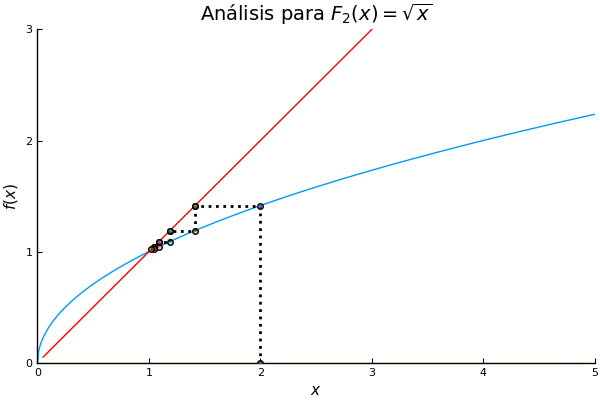
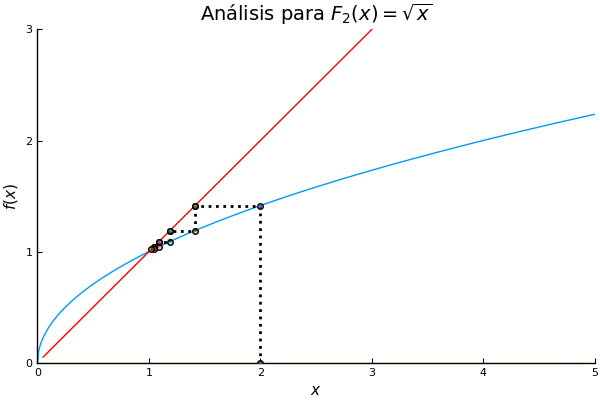

In [10]:
F₂(x) = sqrt(x)
número_iteraciones = 5
a = 0; b = 5; paso = 0.01; c = 0; d = 3;
título = "Análisis para \$ F_2(x) = \\sqrt{x} \$"

@manipulate for x0 in 0:0.1:4

    análisis_gráfico(F₂, número_iteraciones, [x0], a, b, paso, c, d, title = título, colors = [:black])
end

Como se puede observar, se tienen dos puntos fijos: uno en $x_0 = \sqrt{x_0} = 0$ y otro en $x_1 = \sqrt{x_1} = 1$. Más aún, para el muestreo de puntos usado distintos de $x_0$, se observa que $x_1$ tiende a "atraer" las órbitas de otros puntos. Esto se observa gráficamente debido a que las órbitas generadas se acercan a este punto y el cambio generado por la iteración de la función es menor en la región en torno a $x_1$ en comparación a regiones "lejanas" a este punto. Esto se puede obtener analíticamente observando que: $0 < x < 1 \implies 0 < x < \sqrt{x} < 1 $, $1 < x \implies  1 < \sqrt{x} < x < 1$ y $ 0 < x < y \implies 0 < \sqrt{x} < \sqrt{y}$ 

## 3

- Usen el análisis gráfico para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Den explícitamente los puntos fijos.
    
- Usen el método de Newton, usando iterados iniciales  sagazmente seleccionados, para obtener los puntos fijos.

Los puntos fijos de una función $f(x)$ deben satisfacer:

$$ x = f(x) \implies f(x) - x = 0. $$

Por lo que, para la función $F_3(x) = x^2 - 1.1$: $ x^2 -x -1.1 = 0 \implies x = \frac{1}{2} \pm \frac{\sqrt{1 + 4(1.1)}}{2} = \frac{1 \pm \sqrt{5.4} }{2} $. Esto significa que los dos puntos fijos de la función $F_3$ son: 

+ $x_0 = \frac{1 + \sqrt{5.4} }{2} \approx 1.6619$, y,
+ $x_1 = \frac{1 - \sqrt{5.4} }{2} \approx -0.6619$.

Realizando el análisis gráfico de la función $F_3(x) = x^2 - 1.1$ con los siguientes parámetros:

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:x0=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_13", 0, Any[SyncCallback(Scope("knockout-component-eb213b7f-8536-4fc9-86cc-6373cd265886", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["x0"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>401,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_11", ["-2.0", "-1.99", "-1.98", "-1.97", "-1.96", "-1.95", "-1.94", "-1.93", "-1.92", "-1.91"  …  "1.91", "1.92", "1.93", "1.94", "1.95", "1.96", "1.97", "1.98", "1.99", "2.0"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_12", "0.0", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_10", 201, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(-2.0:0.01:2.0)), Observable{Float64}("ob_09", 0.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-2.0:0.01:2.0)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##12#14,Observable{Any}},Tuple{Observable{Float64}}}(##16#17{##12#14,Observable{Any}}(##12#14(), Observable{Any}("ob_14", Plot{Plots.PyPlotBackend() n=103}, Any[])), (Observable{Float64}(#= circular reference @-4 =#),))]), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-2.0:0.01:2.0)), Observable{Any}(#= circular reference @-5 =#), Function[#= circular reference @-2 =#]), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-2 =#)]), SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "index")))]), nothing)), Set(String[]), nothing, Any["knockout"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/gabriel/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.pu
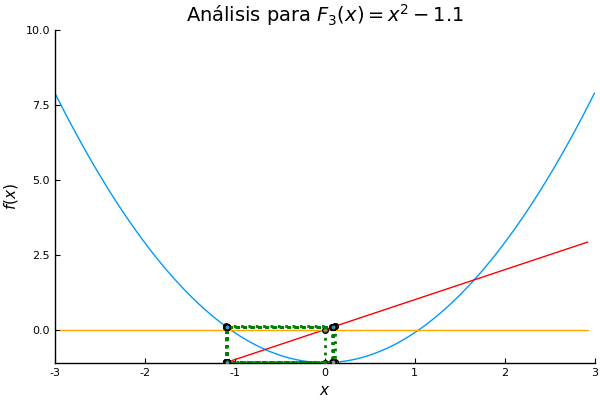
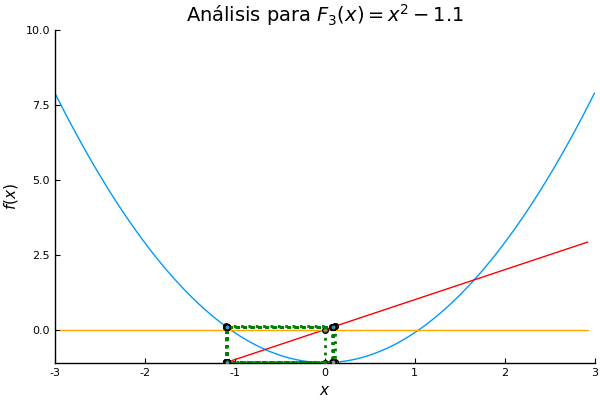

In [11]:
F₃(x) = x^2 - 1.1
número_iteraciones = 100
a = -3; b = 3; paso = 0.05; c = -1.1; d = 10;
título = "Análisis para \$ F_3(x) = x^2 - 1.1 \$"

@manipulate for x0 in -2:0.01:2

    gráfica = análisis_gráfico(F₃, número_iteraciones, [x0], a, b, paso, c, d, title = título, colors = [:green])
end

Usando estos parámetros se encuentra que $ y_0 \approx -1.09 $ y $ y_1 \approx 0.09 $ son dos de los puntos con periodo dos distintos de los puntos de periodo uno $x_0$ y $x_1$. (Ya que un punto fijo por definición es de periodo arbitrario también.) Adicionalmente $ x \approx -1.48 $ y $ x \approx 1.09 $ son puntos que aparentan generar órbitas eventualmente de periodo 2. 

Que solo existan cuatro puntos de periodo dos en todo el dominio ($x_0$, $x_1$, $y_0$ y $y_1$), se puede entender usando el teorema fundamental del álgebra de la siguiente forma:

Un punto $x^*$ de periodo $n$ de la función $G$ debe de satisfacer que:

$$ G^n(x^*) = x^ * \iff G^n(x^*) - x^* = 0, $$

dónde $G^n$ es la función resultante de iterar $ n $ veces la función $G$.

Esto implica que los puntos de periodo 2 de $ F_3 $ deben de satisfacer:

\begin{align}
    F_3^2(y) - x^* &= F_3(F_3(y)) - y \\
        &= F_3(y^2 - 1.1) - x^* \\
        &= (y^2 -1.1)^2 - 1.1 - x^* \\
        &= (y)^4 - 2.2 y^2 - y - + (1.1)^2 - 1.1
\end{align}

Como esto es un polinomio de grado 4, cuanto más, existen cuatro puntos (complejos) que son raíces de esta ecuación. 

Para conocer los puntos que satisfacen esta ecuación directamente desde Julia, se puede usar el paquete `SymPy.jl`. Para esto, conviene definir una función que de la n-ésima iteración "simbólica" de una función dada:

In [12]:
"""
    función_iterar(f::Function, número_iteraciones::Int)

Devuelve la función "simbólica" proveniente de iterar `f` el `número_iteraciones` dado.

# Argumentos

Requiere:

+ `f`, una función, y,
+ `número_iteraciones`, un entero que dicta el número de iteraciones a realizar.

# Ejemplo
```julia-repl

julia> f = x -> x^2 - 1; g = función_iterar(f, 2); g(1)
-1

julia> f = x -> x^2 - 1; g = función_iterar(f, 2); g(0)
0
```
"""
function función_iterar(f::Function, número_iteraciones::Int)
    
    if número_iteraciones == 1
        
        return(f)
        
    else
        
        return(x -> f(función_iterar(f, número_iteraciones - 1)(x)))
            
    end
end

función_iterar

La función cuyas raíces son los puntos de periodo $k$ de $F_3$ está dada por:

In [13]:
puntos_fijos_F₃(k, x) = función_iterar(F₃, k)(x) - x
puntos_fijos_F₃(k) = x -> puntos_fijos_F₃(k, x)

puntos_fijos_F₃ (generic function with 2 methods)

Los puntos de periodo uno son:

In [14]:
using SymPy

y = Sym("y")
puntos_fijos = solve(puntos_fijos_F₃(1)(y)) |> float

2-element Array{Float64,1}:
 -0.6618950038622251
  1.661895003862225 

Y los puntos de periodo dos son:

In [15]:
puntos_periodo_2_F₃ = solve(puntos_fijos_F₃(2)(y)) |> float

4-element Array{Float64,1}:
 -1.0916079783099617
 -0.6618950038622251
  0.0916079783099616
  1.661895003862225 

Como se puede observar, los puntos estudiados gráficamente son obtenidos numéricamente a partir de métodos simbólicos.

Obsérvese que esto no quiere decir que los únicos puntos que generan órbitas eventualmente de periodo dos sean estos, sino que si algún punto ($ x \approx -1.48, 1.09 $, por ejemplo) contiene a alguno de los cuatro puntos mencionados como algún iterado, la órbita "final" de estos es idéntica a la "total" de los cuatro puntos mencionados.

Finalmente, para apreciar que en efecto estos puntos son los de periodo dos:

In [16]:
using Colors

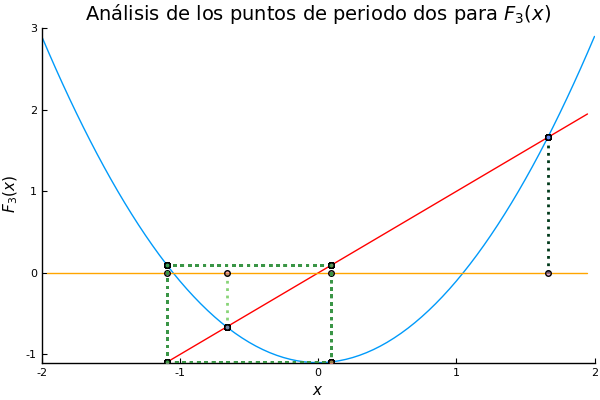

In [17]:
número_iteraciones = 100
x0 = puntos_periodo_2_F₃
a = -2; b = 2; paso = 0.05; c = -1.1; d = 3;
título = "Análisis de los puntos de periodo dos para \$ F_3(x) \$"
título_y = " \$ F_3(x) \$"
colores = [colormap("Greens", 8)[2*i] for i in 1:4]

gráfica_puntos_periodo_2_F₃ = análisis_gráfico(F₃, número_iteraciones, x0, a, b, paso, c, d, title = título, ylabel = título_y, colors = colores)

Y los puntos que generan órbitas eventualmente periódicas encontrados son:

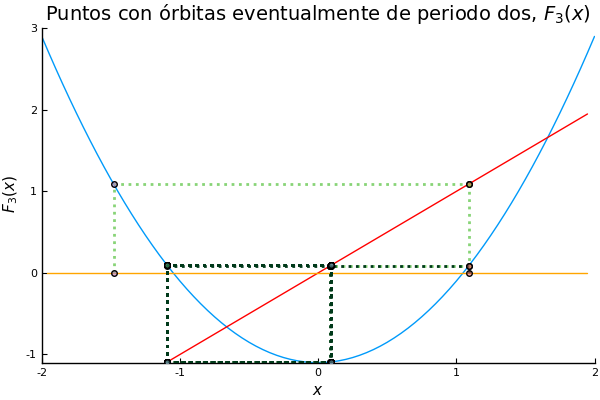

In [18]:
número_iteraciones = 100
x0 = x0 = [-1.48, 1.09]
a = -2; b = 2; paso = 0.05; c = -1.1; d = 3;
título = "Puntos con órbitas eventualmente de periodo dos, \$ F_3(x) \$"
título_y = " \$ F_3(x) \$"
colores = [colormap("Greens", 8)[4*i] for i in 1:2]

gráfica_puntos_órbita_eventualmente_periodo_2 = análisis_gráfico(F₃, número_iteraciones, x0, a, b, paso, c, d, title = título, ylabel = título_y, colors = colores)

Una idea para encontrar otros puntos que generan órbitas eventualmente periódicas es ver las raíces de la función cuando esta es igualada a algún punto de periodo conocido. Descartando los puntos que ya se saben forman parte de la órbita o son otros puntos con órbitas eventualmente periódicas permiten tener una lista de puntos que poseen órbitas eventualmente periódicas. 

Para poder encontrar los puntos de periodo 2 usando herramientas desarrolladas en el curso, conviene cargar los siguientes [módulos](https://docs.julialang.org/en/v1/manual/modules/): 

In [19]:
push!(LOAD_PATH, "../Código")

using Newton
using DifAutom

┌ Info: Recompiling stale cache file /home/gabriel/.julia/compiled/v1.0/Newton.ji for Newton [top-level]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /home/gabriel/.julia/compiled/v1.0/DifAutom.ji for DifAutom [top-level]
└ @ Base loading.jl:1184


Definiendo la derivada de la función para calcular los puntos fijos usando duales:

In [20]:
puntos_fijos_F₃_prime(k) = x -> derivada_dual(puntos_fijos_F₃(k), x)

puntos_fijos_F₃_prime (generic function with 1 method)

Para poder determinar algunas condiciones iniciales de interés, conviene graficar la función cuyas raíces son los puntos de periodo 1:

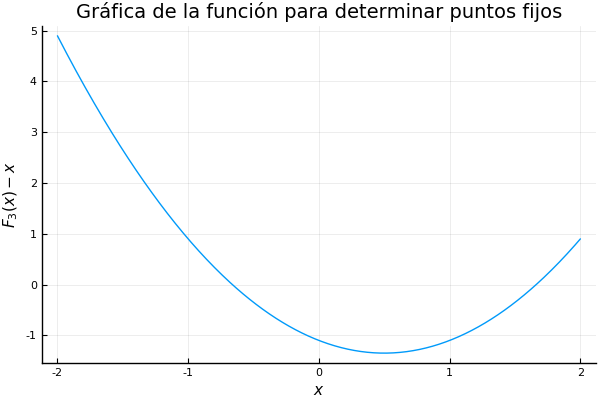

In [21]:
plot(-2:0.01:2, puntos_fijos_F₃(1), key = false, title = "Gráfica de la función para determinar puntos fijos", xlabel = L"x", ylabel = L"F_3(x) - x")

Como se puede observar, tomando $x_0 = \pm 2$, probablemente se tienen los puntos fijos de $F_3$ como resultado de aplicar el método de Newton a la función anterior.

Calculando los puntos fijos usando el método de Newton en la función adecuada (`puntos_fijos_F₃(k)` con $k = 1$):

In [22]:
k = 1

@show x0 = 2
@show newton(puntos_fijos_F₃(k), puntos_fijos_F₃_prime(k), x0)

@show x0 = -2
@show newton(puntos_fijos_F₃(k), puntos_fijos_F₃_prime(k), x0);

x0 = 2 = 2
newton(puntos_fijos_F₃(k), puntos_fijos_F₃_prime(k), x0) = 1.661895003862225
x0 = -2 = -2
newton(puntos_fijos_F₃(k), puntos_fijos_F₃_prime(k), x0) = -0.6618950038622251


Se obseva un acuerdo "suficiente" (un ligero desacuerdo en la última cifra decimal en uno de los puntos) con los puntos fijos calculados numéricamente por `SymPy.jl` y el cálculo numérico con herramientas desarrolladas en el curso. Más aún, como:

In [23]:
@show (1 - sqrt(5.4))/2
@show (1 + sqrt(5.4))/2;

(1 - sqrt(5.4)) / 2 = -0.6618950038622251
(1 + sqrt(5.4)) / 2 = 1.661895003862225


Se observa un acuerdo en general con los resultados obtenidos analítica y numéricamente.

## 4

Hagan un análisis completo de las posibles órbitas de los siguientes mapeos, usando distintos colores para distintas órbitas. Interesa entre otras cosas saber cuántos puntos fijos tiene y cómo es la dinámica cerca de ésos puntos.

- $F_1(x) = \frac{1}{3x}$.

- $F_2(x) = -\frac{x^5}{5}$.

- $F_3(x) = \frac{x}{2}-2$.

#### 1.- $F_1(x) = \frac{1}{3x}$

Definiendo $F_1(x)$:

In [24]:
F₁(x) = 1/(3*x)

F₁ (generic function with 1 method)

Para darse una idea general de lo que está ocurriendo, se puede hacer algo similar que en el ejercicio anterior:

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:x0=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_21", 0, Any[SyncCallback(Scope("knockout-component-06db58c4-66e8-4470-83ff-0cc5b7bc1361", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["x0"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>101,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_19", ["-5.0", "-4.9", "-4.8", "-4.7", "-4.6", "-4.5", "-4.4", "-4.3", "-4.2", "-4.1"  …  "4.1", "4.2", "4.3", "4.4", "4.5", "4.6", "4.7", "4.8", "4.9", "5.0"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_20", "0.0", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_18", 51, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(-5.0:0.1:5.0)), Observable{Float64}("ob_17", 0.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-5.0:0.1:5.0)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##26#28,Observable{Any}},Tuple{Observable{Float64}}}(##16#17{##26#28,Observable{Any}}(##26#28(), Observable{Any}("ob_22", Plot{Plots.PyPlotBackend() n=13}, Any[])), (Observable{Float64}(#= circular reference @-4 =#),))]), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-5.0:0.1:5.0)), Observable{Any}(#= circular reference @-5 =#), Function[#= circular reference @-2 =#]), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-2 =#)]), SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "index")))]), nothing)), Set(String[]), nothing, Any["knockout"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/gabriel/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n   
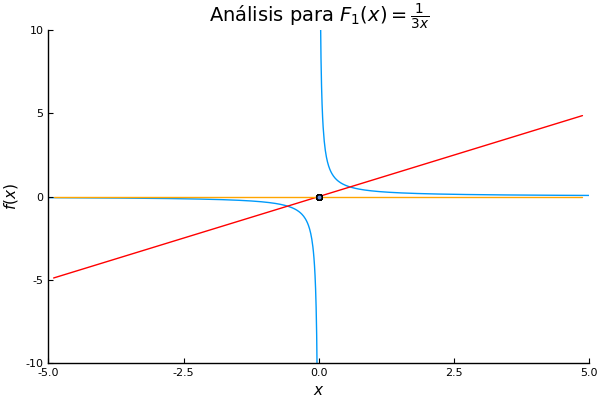
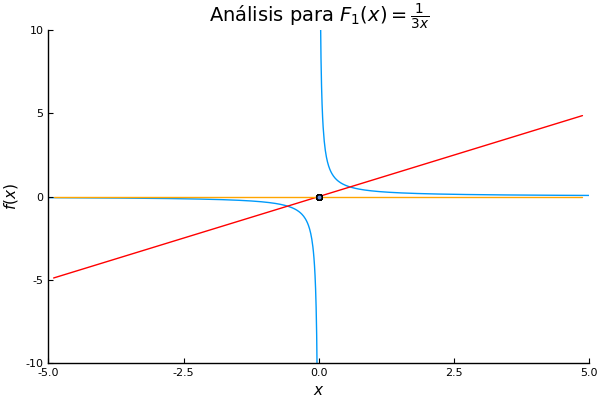

In [25]:
número_iteraciones = 10
a = -5; b = 5; paso = 0.01; c = -10; d = 10;
título = "Análisis para \$ F_1(x) = \\frac{1}{3x} \$"

@manipulate for x0 in -5:0.1:5

    análisis_gráfico(F₁, número_iteraciones, [x0], a, b, paso, c, d, title = título, colors = [:green])
end

Aparentemente todos los puntos de muestreo, salvo cero, son puntos de periodo dos. Destacan como puntos fijos los esperados: la intersección de la hipérbola con la identidad. Más aún, se observa que la órbita generada por los puntos de muestreo está confinada a la rama de la hipérbola a la que pertenece el punto inicial. Todo esto se puede demostrar formalmente o calcular de la siguiente manera:

+ **Todos los puntos en el dominio son puntos de periodo dos:**

Se tiene que si $ x \in \mathbb{R}-\{0\}$,  $F_2^2(x) = F_2(F_2(x)) = F_2(\frac{1}{3x}) = \frac{1}{3\left(\frac{1}{3x}\right)} = \frac{1}{\left(\frac{1}{x}\right)} = x$.

+ **Los puntos fijos son la intersección de la hipérbola con la identidad:**

Los puntos fijos satisfacen que: $ x = F_2(x)$. De esto, se tiene que:

$$ x \in \mathbb{R} - \{0\} \implies F_2(x) = \frac{1}{3x} = x \iff 3x^2 - 1 = 0 \iff x = \pm \frac{1}{\sqrt{3}}$$

+ **Las órbitas generadas por los puntos del dominio están contenidas en la rama de hipérbola a la que pertenece el punto inicial:**

Supóngase s.p.g. que $ x > 0 $, entonces $F_1(x) = \frac{1}{3x} > 0$. Como un punto en el dominio es siempre de periodo 2, se tiene el resultado para la rama derecha. El resultado para la otra rama se puede demostrar análogamente.

Para estudiar la dinámica de los puntos cercanos a los puntos fijos, se puede realizar lo siguiente:

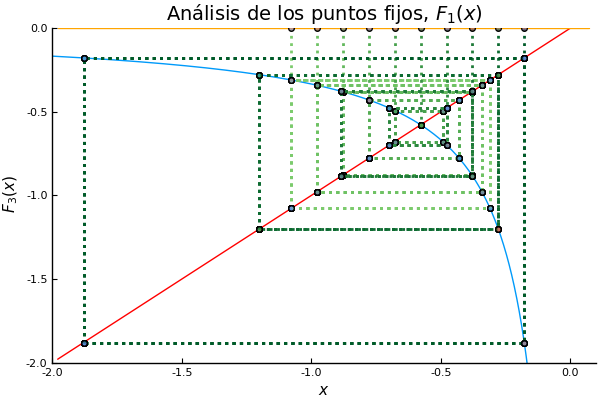

In [26]:
#Considerando un ensamble de puntos en torno a:
x_1_a = -1/sqrt(3)
ensamble_1_a = (x_1_a - 0.5):0.1:(x_1_a + 0.5) |> collect

número_iteraciones = 10
a = -2; b = 0.1; paso = 0.001; c = -2; d = 0;
título = "Análisis de los puntos fijos, \$F_1(x)\$"
colores = [colormap("Greens", 22)[i] for i in 11:22]

análisis_F₁_a = análisis_gráfico(F₁, número_iteraciones, ensamble_1_a, a, b, paso, c, d, title = título, ylabel = título_y, colors = colores)

Se observa que los puntos de lado izquierdo al punto fijo generan órbitas más "cerradas" que los simétricos respecto al punto fijo correspondientes del lado derecho. Las órbitas son más cerradas al acercarse los puntos iniciales al punto fijo. 

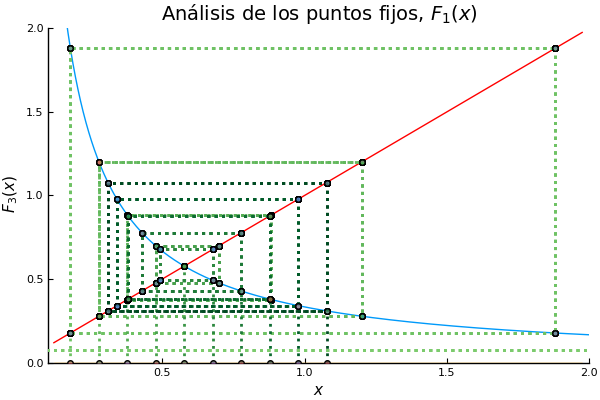

In [27]:
#Considerando un ensamble de puntos en torno a:
x_1_b = 1/sqrt(3)
ensamble_1_b = (x_1_b - 0.5):0.1:(x_1_b + 0.5) |> collect

número_iteraciones = 10
a = 0.1; b = 2; paso = 0.001; c = 0; d = 2;
título = "Análisis de los puntos fijos, \$F_1(x)\$"
colores = [colormap("Greens", 22)[i] for i in 11:22]

análisis_F₁_b = análisis_gráfico(F₁, número_iteraciones, ensamble_1_b, a, b, paso, c, d, title = título, ylabel = título_y, colors = colores)

Se observa algo similar que en el otro punto fijo, salvo que las órbitas más cerradas se encuentran a la derecha del punto cuando se comparan puntos simétricos respecto al punto fijo. El origen se comporta como un "repulsor"; esto se explica por la indeterminación de la derivada de la función $F_1(x)$ en el origen.

#### 2.- $F_2(x) = -\frac{x^5}{5}$

Definiendo $F_2(x)$:

In [28]:
F₂(x) = -x^5 / 5

F₂ (generic function with 1 method)

Para darse una idea general de lo que está ocurriendo, se puede hacer algo similar que en el ejercicio anterior:

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:x0=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_29", 0, Any[SyncCallback(Scope("knockout-component-f09f677b-7751-4cba-8225-de21f170a613", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["x0"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>401,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_27", ["-2.0", "-1.99", "-1.98", "-1.97", "-1.96", "-1.95", "-1.94", "-1.93", "-1.92", "-1.91"  …  "1.91", "1.92", "1.93", "1.94", "1.95", "1.96", "1.97", "1.98", "1.99", "2.0"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_28", "0.0", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_26", 201, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(-2.0:0.01:2.0)), Observable{Float64}("ob_25", 0.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-2.0:0.01:2.0)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##34#36,Observable{Any}},Tuple{Observable{Float64}}}(##16#17{##34#36,Observable{Any}}(##34#36(), Observable{Any}("ob_30", Plot{Plots.PyPlotBackend() n=13}, Any[])), (Observable{Float64}(#= circular reference @-4 =#),))]), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-2.0:0.01:2.0)), Observable{Any}(#= circular reference @-5 =#), Function[#= circular reference @-2 =#]), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-2 =#)]), SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "index")))]), nothing)), Set(String[]), nothing, Any["knockout"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/gabriel/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.pun
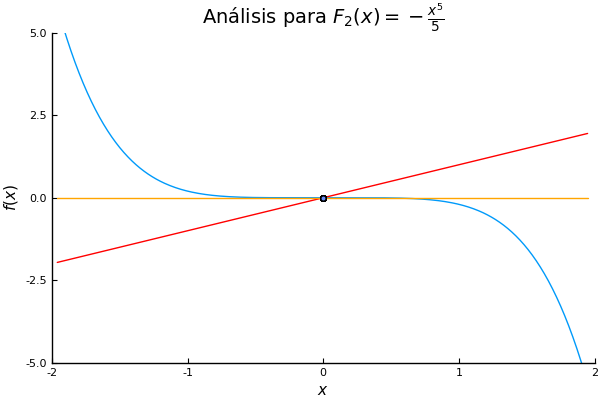
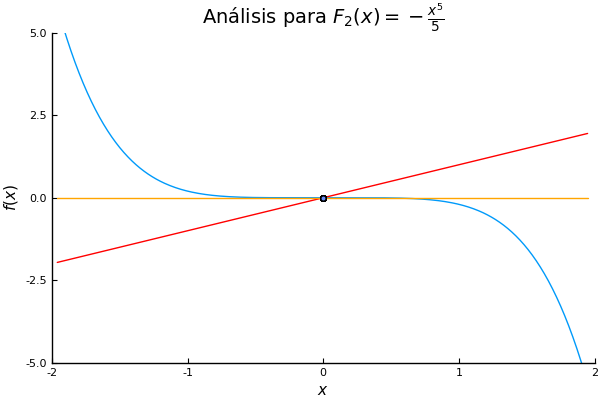

In [29]:
número_iteraciones = 10
a = -2; b = 2; paso = 0.01; c = -5; d = 5;
título = "Análisis para \$ F_2(x) = -\\frac{x^5}{5} \$"

@manipulate for x0 in -2:0.01:2

    análisis_gráfico(F₂, número_iteraciones, [x0], a, b, paso, c, d, title = título, colors = [:green])
end

Se observa que para los puntos de muestreo fuera del intervalo [-1.4, 1.4] las órbitas divergen, mientras que para los puntos al interior del intervalo, las órbitas convergen a cero. El único punto fijo identificable se encuentra en el origen. No se observan puntos de periodo dos distintos del origen dentro del conjunto de puntos muestra, sin embargo, existen puntos que no se visualizan en la muestra anterior. Esto se puede entender de la siguiente forma:

+ **Puntos de periodo dos:**

Se tiene que $F_2^2(x) = F_2(F_2(x)) = -\frac{1}{5} \left( -\frac{x^5}{5} \right)^5 = \frac{x^{25}}{5^6} $. Como los puntos de periodo dos deben satisfacer que $F_2^2(x) = x = \frac{x^{25}}{5^6}$, se tiene que $ x^{25} - 5^6 x = x(x^{24} - 5^6) = 0$.

Usando productos notables se tiene que:

\begin{align}
    0 &= x(x^{24} - 5^6) \\
      &= x(x^{12} + 5^3)(x^{6} + 5^\frac{3}{2})(x^{3} + 5^\frac{3}{4})(x^{3} - 5^\frac{3}{4}) \\
      &= x(x^{12} + 5^3)(x^{6} + 5^\frac{3}{2})(x + 5^\frac{1}{4})(x^2 - 5^\frac{1}{4}x + 5^\frac{1}{2})(x - 5^\frac{1}{4})(x^2 + 5^\frac{1}{4}x + 5^\frac{1}{2})
\end{align}

De dónde, dado que $ \pm 5^\frac{1}{2} - 4 \cdot 5^\frac{1}{2} = (\pm 1 - 4)5^\frac{1}{2} < 0$ (un análisis del discriminante de los factores cuadráticos), se tiene que los únicos puntos reales de periodo dos son: $x = 0, \pm \sqrt[4]{5}$. Esto explica el por qué no se observaron en la visualización los últimos dos puntos: debido a que son irracionales.

+ **Puntos fijos**

Dado que los puntos fijos deben de satisfacer la ecuación $F_2(x) = x = - \frac{x^5}{5}$, se tiene que $x^5 + 5 x = x (x^4 + 5)$, por lo que el único punto fijo real es $x = 0$

+ **Cotas para el cambio de comportamiento de las órbitas que convergen a cero**

Para saber en qué punto las órbitas pasan de ser convergentes a divergentes, se puede hacer lo siguiente:

Una órbita convergente a cero debe de satisfacer que: $ |F_2(x)| = \frac{|x|^5}{5} < |x|$. De dónde:

$$ |x|^5 - 5 |x| = |x|(x^4 - 5) < 0 \iff x^4 < 5  \implies |x| < \sqrt[4]{5}.$$

Por lo que toda órbita convergente a cero debe tener su punto inicial en el intervalo $(-\sqrt[4]{5}, \sqrt[4]{5}) \approx (-1.49, 1.49)$. Por un argumento similar, toda órbita divergente de cero debe tener su punto inicial en el exterior de dicho intervalo. Dada la generalidad de este argumento, es posible asegurar que toda órbita con punto inicial en dicho intervalo converge a cero y toda órbita afuera de dicho intervalo no converge (es divergente o periódica fuera del origen).

Para estudiar la dinámica de los puntos cercanos al origen, se puede realizar lo siguiente:

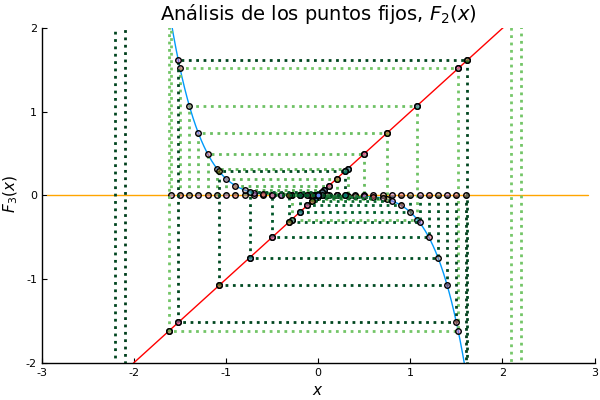

In [30]:
#Considerando un ensamble de puntos en torno a:
x_2_a = 0
ensamble_2_a = (x_2_a - 1.6):0.1:(x_2_a + 1.6) |> collect

número_iteraciones = 10
a = -3; b = 3; paso = 0.001; c = -2; d = 2;
título = "Análisis de los puntos fijos, \$F_2(x)\$"
colores = [colormap("Greens", 66)[i] for i in 33:66]

análisis_F₂_a = análisis_gráfico(F₂, número_iteraciones, ensamble_2_a, a, b, paso, c, d, title = título, ylabel = título_y, colors = colores)

Como se puede observar, los puntos al interior del intervalo señalado tienen órbitas convergentes, pero cada vez más "abiertas" conforme se acercan a los extremos del mismo. En el momento en el que llegan al extremo, se vuelven periódicas. Fuera de este intervalo, las órbitas divergen.

#### 3.- $F_3(x) = \frac{x}{2} - 2$

Definiendo $F_3(x)$:

In [31]:
F₃(x) = x/2 - 2

F₃ (generic function with 1 method)

Para darse una idea general de lo que está ocurriendo, se puede hacer algo similar que en ejercicios anteriores:

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:x0=>Widget{:slider,Float64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_37", 0, Any[SyncCallback(Scope("knockout-component-d6b2522b-69bd-472c-966e-5c7aab26ab50", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["x0"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>1001,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("formatted_vals"=>(Observable{Any}("ob_35", ["-9.0", "-8.99", "-8.98", "-8.97", "-8.96", "-8.95", "-8.94", "-8.93", "-8.92", "-8.91"  …  "0.91", "0.92", "0.93", "0.94", "0.95", "0.96", "0.97", "0.98", "0.99", "1.0"], Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_vals")))]), nothing),"changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"formatted_value"=>(Observable{String}("ob_36", "-4.0", Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "formatted_value")))]), nothing),"index"=>(Observable{Any}("ob_34", 501, Any[##25#28{##70#73,Observable{Float64},Array{Function,1}}(##70#73(Box(-9.0:0.01:1.0)), Observable{Float64}("ob_33", -4.0, Any[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-9.0:0.01:1.0)), Observable{Any}(#= circular reference @-6 =#), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(#= circular reference @-2 =#), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-5 =#)]), #g#15{##16#17{##40#42,Observable{Any}},Tuple{Observable{Float64}}}(##16#17{##40#42,Observable{Any}}(##40#42(), Observable{Any}("ob_38", Plot{Plots.PyPlotBackend() n=13}, Any[])), (Observable{Float64}(#= circular reference @-4 =#),))]), Function[##24#27{##68#71,Observable{Any},Array{Function,1}}(##68#71(Box(-9.0:0.01:1.0)), Observable{Any}(#= circular reference @-5 =#), Function[#= circular reference @-2 =#]), ##25#28{##70#73,Observable{Float64},Array{Function,1}}(#= circular reference @-2 =#)]), SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "index")))]), nothing)), Set(String[]), nothing, Any["knockout"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/home/gabriel/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/home/gabriel/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/home/gabriel/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("formatted_vals"=>Any[JSString("(function (val){return (val!=this.model[\"formatted_vals\"]()) ? (this.valueFromJulia[\"formatted_vals\"]=true, this.model[\"formatted_vals\"](val)) : undefined})")],"_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.
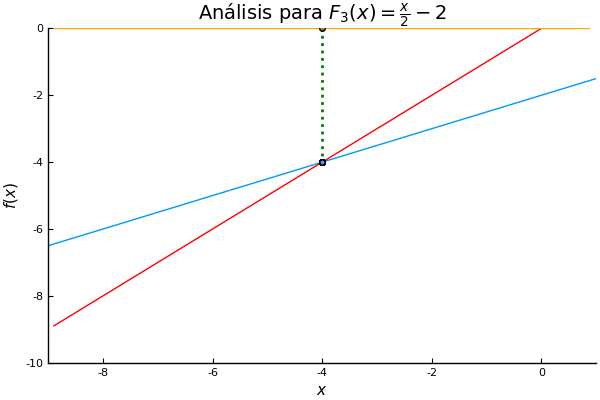
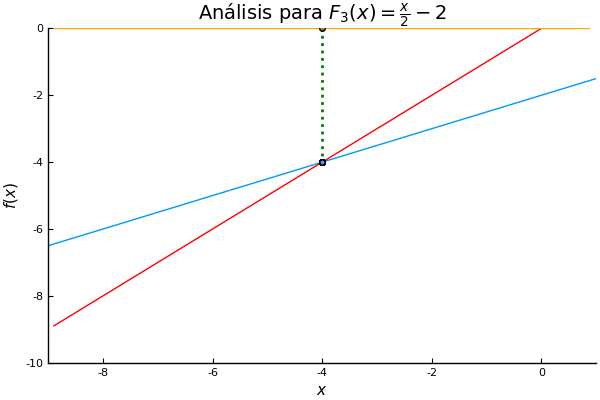

In [32]:
número_iteraciones = 10
a = -9; b = 1; paso = 0.01; c = -10; d = 0;
título = "Análisis para \$ F_3(x) = \\frac{x}{2} - 2 \$"

@manipulate for x0 in -9:0.01:1

    análisis_gráfico(F₃, número_iteraciones, [x0], a, b, paso, c, d, title = título, colors = [:green])
end

Se observa que todos los puntos muestra generan órbitas convergentes a $x = -4$, el único punto fijo encontrado.

+ **Punto fijos**

Dado que los puntos fijos deben de satisfacer la ecuación $F_3(x) = x = \frac{x}{2} - 2$, se tiene que el único punto fijo es $x = -4$.

+ **Puntos de periodo dos:**

Se tiene que $F_3^2(x) = F_3(F_3(x)) = -\frac{1}{2} \left( \frac{x}{2} - 2 \right) - 2 = \frac{x}{4} - 3 $. Como los puntos de periodo dos deben satisfacer que $F_3^2(x) = x = \frac{x}{4} - 3$, se tiene que $ x = -4$. (No hay puntos de orden dos distintos al punto fijo.)

Para estudiar la dinámica de los puntos cercanos al origen, se puede realizar lo siguiente:

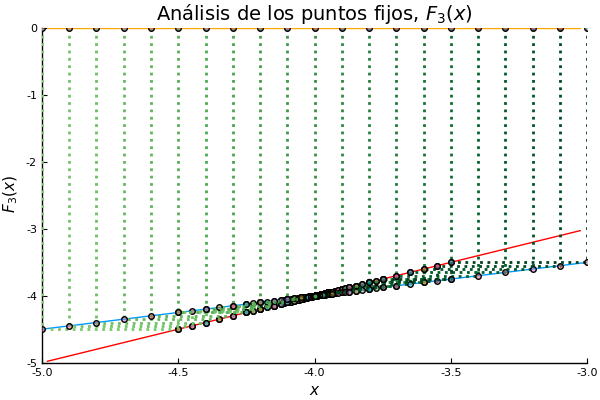

In [33]:
#Considerando un ensamble de puntos en torno a:
x_3_a = -4
ensamble_3_a = (x_3_a - 1):0.1:(x_3_a + 1) |> collect

número_iteraciones = 10
a = -5; b = -3; paso = 0.001; c = -5; d = 0;
título = "Análisis de los puntos fijos, \$F_3(x)\$"
colores = [colormap("Greens", 42)[i] for i in 21:42]

análisis_F₃_a = análisis_gráfico(F₃, número_iteraciones, ensamble_3_a, a, b, paso, c, d, title = título, ylabel = título_y, colors = colores)

Como se puede observar, todas las órbitas generadas por los puntos muestra son convergentes al punto fijo.

## 5

- Para el mapeo mapeo $F(x) = x^2-2$ en el intervalo $[-2,2]$ (ejercicio 1), consideren un punto al azar en el intervalo $[-2,2]$ y construyan una órbita muy larga, por ejemplo, de $20\,000$ iterados. Obtengan el histograma de frecuencia (normalizado) de visita de los puntos de la órbita. ¿Qué conclusión podemos sacar de este histograma?

- \Repitan el inciso anterior para el mapeo: $G(x) = 2x \mod 1$ en el intervalo [0,1].

(NOTA: En cuanto al histograma, pueden construir su propia función que haga el histograma, o buscar en las entrañas de la documentación.)

Para realizar el histograma, suena lógico usar la función `histogram` presente en `Plots.jl`; más aún, para hacerlo de forma [normalizada](https://github.com/JuliaPlots/Plots.jl/issues/79) se puede usar el *keyword argument* `normed = true`. Tomando como un ejemplo a 100000 flotantes provenientes de una distribución uniforme en $[0, 1)$:

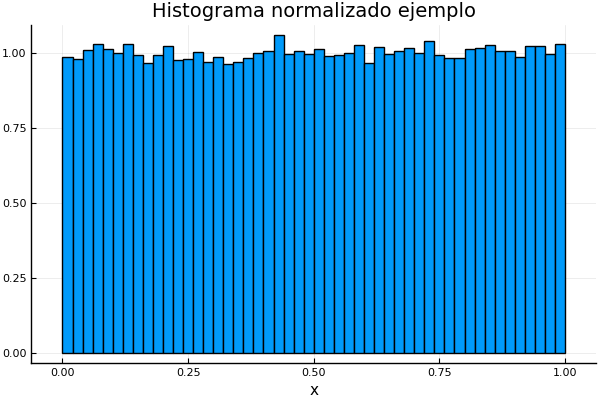

In [34]:
datos_histograma_ejemplo = rand(100000)

histograma_ejemplo_pdf = histogram(datos_histograma_ejemplo, normed = true, title = "Histograma normalizado ejemplo", xlabel = "x", ylabel = "", legend = false)

A propósito se dejó el título del eje $y$ en blanco. Como se puede observar: ¡esto no corresponde a lo esperado! (Que la normalización deje un número entre cero y uno en cada "bote".) [Esto](https://discourse.julialang.org/t/plots-how-to-create-a-histogram-such-that-sum-of-bar-heights-1/5392) se debe a que la normalización por defecto en la función `histogram` corresponde a graficar los datos como si fueran muestras de una función de densidad de probabilidad (*probability density function (pdf)*, en inglés). Esto quiere decir que lo que se normaliza es el ***área*** del histograma, no la suma de las longitudes de las barras de cada "bote". (La normalización usual que se toma como el número de casos favorables entre el número total.)

Para obtener el comportamiento esperado, en lugar de usar la opción `true` (equivalente a `:pdf`) en el argumento `normed`, se puede [usar](https://discourse.julialang.org/t/plots-how-to-create-a-histogram-such-that-sum-of-bar-heights-1/5392/24) la opción `:probability`.

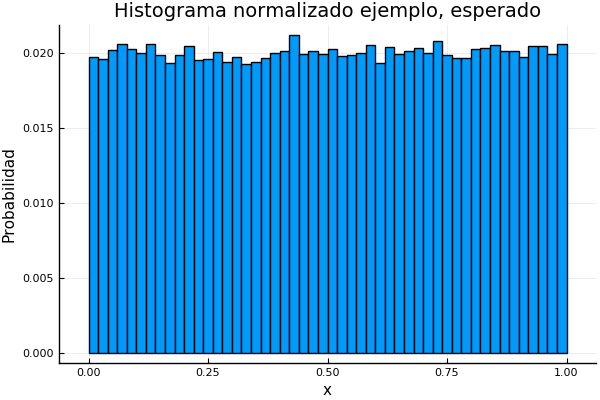

In [35]:
histograma_ejemplo_probabilidad = histogram(datos_histograma_ejemplo, normed = :probability, title = "Histograma normalizado ejemplo, esperado", xlabel = "x", ylabel = "Probabilidad", legend = false)

Hecha esta aclaración, se puede proceder a realizar lo solicitado tomando 20000 iteraciones:

1. Para la función $F(x) = x^2 - 2$ en el intervalo $[-1, 1]$:

Como `rand` da un flotante entre $[0, 1)$ por defecto, conviene multiplicar por cuatro y restar por dos la salida de esta para dar un flotante entre $[-2, 2)$. (En teoría falta uno de los extremos, pero tomando suficientes datos, dado que en reales un punto tiene medida cero, los resultados no deberían de diferir.) 

x0 = 4 * rand() - 2 = 1.4549219867875376


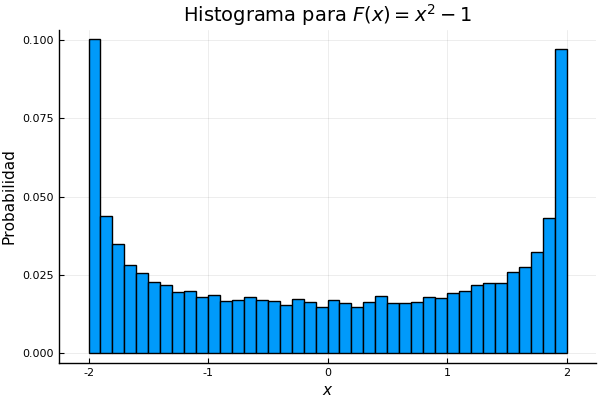

In [36]:
número_iteraciones = 20000
@show x0 = 4*rand() - 2

iteraciones_F = iteraciones(F, número_iteraciones, x0)

histograma_F = histogram(iteraciones_F, normed = :probability, title = LaTeXString("Histograma para \$F(x) = x^2 - 1\$"), xlabel = L"x", ylabel = "Probabilidad", legend = false, nbins = 40)

De esto, se puede concluir que la probabilidad de encontrar a un iterado de $x_0$ "cerca" de los extremos es mayor que en medio. Para entender esto un poco más analíticamente se puede decir, por ejemplo, que la probabilidad de encontrar a un iterado de $x_0$ dentro del conjunto $[-2, -1.9) \cup [1.9, 2)$, considerando las limitaciones de los números flotantes, es de aproximadamente 20%. Si se toma en su lugar el conjunto $[-2, -1.8) \cup [1.8, 2)$, esta probabilidad aumenta a aproximadamente el 30%. Esto, entendido desde la persepectiva global de la órbita generada por $x_0$, nos dice del mismo. Cabe notar que la forma del histograma parece sugerir que la distribución es simétrica respecto del cero, esto suena sensato considerando que $F(x)$ es una función par, sin embargo, no imagino alguna forma de demostrar esto de forma analítica.

2. Para la función $G(x) = 2x \, \textrm{mód } 1$ en el intervalo $[0, 1]$:

Es necesario definir la función $G(x)$:

In [37]:
G(x) = 2*x % 1

G (generic function with 1 method)

Una vez realizado esto, considerando el comentario sobre `rand` anterior, se puede hacer algo análogo para $G(x)$ a partir de lo hecho para $F(x)$:

x0 = rand() = 0.5623289799549935


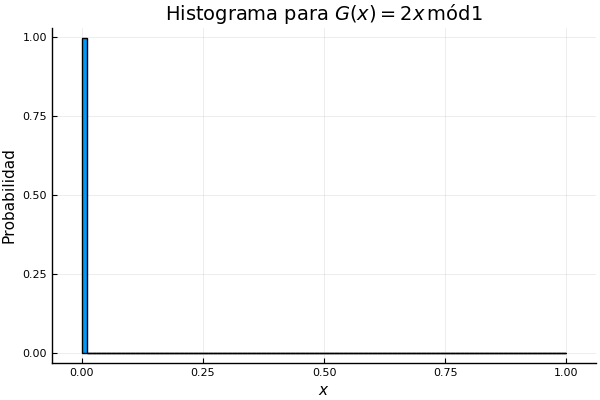

In [38]:
@show x0 = rand()

iteraciones_G = iteraciones(G, número_iteraciones, x0)

histograma_G = histogram(iteraciones_G, normed = :probability, title = LaTeXString("Histograma para \$G(x) = 2x\\, \\mathrm{mód } 1 \$"), xlabel = L"x", ylabel = "Probabilidad", legend = false, nbins = 100)

El histograma pareciera indicar que las iteraciones *siempre* se dan entre $[0, 0.01)$, sin embargo, esto no es así (ya que $G(x)$ es una función creciente en $[0, 1)$). Lo que sucede es que la probabilidad de terminar en este conjunto es "exageradamente" mayor a terminar fuera de él. Esto se puede observar tomando menos iteraciones pero con la misma condición inicial:

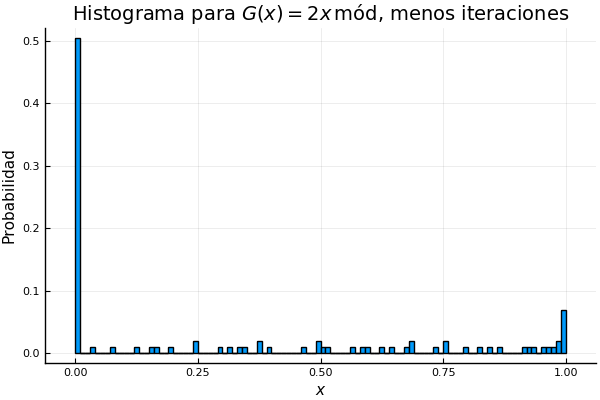

In [39]:
número_iteraciones = 100

iteraciones_G_2 = iteraciones(G, número_iteraciones, x0)

histograma_G_2 = histogram(iteraciones_G_2, normed = :probability, title = LaTeXString("Histograma para \$G(x) = 2x\\, \\mathrm{mód } \$, menos iteraciones"), xlabel = L"x", ylabel = "Probabilidad", legend = false, nbins = 100)

Como se puede ver, a pesar de tenerse "pocas" iteraciones (100 en este caso), se observa ese "sesgo" a que los iterados de $x_0$ estén cerca del cero. Esto quiere decir, desde la perspectiva de la órbita, que la misma, al tomar más iteraciones, tiende a localizarse cerca de cero. (¿Cero es un punto atractor de este mapeo?)

## 6

Analicen los mapeos

- F(x) = x^2,

- F(x) = x^3,

- F(x) = -x^3,

que se satisface $F(0) = F'(0) = 0$. ¿Qué podemos decir de la convergencia?

Para poder realizar el análisis de las funciones, se puede usar la función `análisis gráfico` definida anteriormente:

1.- $F_4(x) = x^2$:

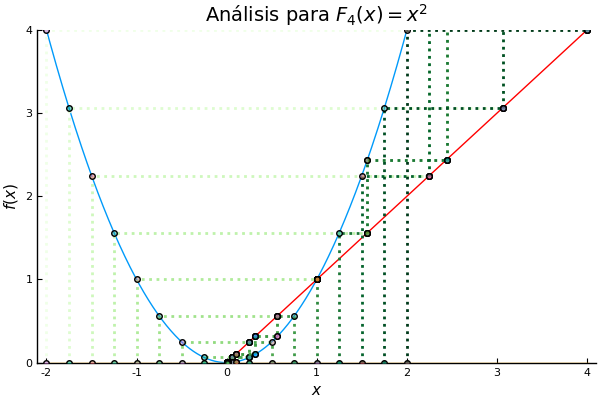

In [40]:
F₄(x) = x^2
número_iteraciones = 5
a = -2.1; b = 4.1; paso = 0.01; c = 0; d = 4;
título = "Análisis para \$ F_4(x) = x^2 \$"
x0 = -2:1/4:2 |> collect
colores = [colormap("Greens", 2*17)[2*i] for i in 1:17]

análisis_gráfico(F₄, número_iteraciones, x0, a, b, paso, c, d, title = título, colors = colores)

Se observan principalmente tres cosas:

1. Toda órbita con condición inicial negativa, $-x_0$ "colapsa" en la órbita con condición inicial positiva igual a $x_0$ a partir de la primera iteración.

2. Todas las órbitas tomadas de ejemplo dentro del intervalo $(-1, 1)$ parecen converger a cero, mientras que los puntos $ x_0 = 0, 1$ parecen ser puntos fijos. 

3. Todas las órbitas tomadas de ejemplo fuera de los casos anteriores parecen diverger a infinito.

En general estos tres puntos se pueden demostrar formalmente como sigue:

1. Basta observar que $F_4(\pm x) = x^2 \implies F_4^k(\pm x) = x^{2k}$ para $k \in \mathbb{N}-\{0\}$.

2. Sea $x \in A = (-1, 1)$. Obviando el caso trivial, si se elige $\varepsilon > 0$ siempre se puede encontrar una potencia de $x$, $x^n$ tales que $x^n < \varepsilon$ (en particular una par o posteriormente, una múltiplo de tres). Esta potencia está dada por cualquier entero mayor que  $m = \lceil \frac{\ln \varepsilon}{\ln x} \rceil + 1$. Esto debido a que $ 0 < |x| < 1 \implies -|x| < |x|^2 = x^2 < |x|.$ Esto indica que las órbitas con condición inicial entre -1 y 1 se quedan confinadas en el intervalo y además convergen *siempre* a cero. 

Conviene hacer el argumento un tanto general, por lo que defínase la función $G_k(x) = x^k$ con $k \in \mathbb{N} - \{0\}$. El caso en el que $k = 1$, todos los puntos del dominio son fijos. Para verificar que $x_0 = 1$ es el único punto fijo no nulo en los reales si $k \neq 1$, basta usar de nuevo la definición y despejar:

$$ G_k(x)= x^k = x \iff x^k - x = x(x^{k-1} - 1) = 0 $$

De esto se obtiene que x = 0 es un punto fijo para todo valor de $k \in \mathbb{N} -\{0, 1\}$ si $ G_k (x) = x^k$. Más aún, se tiene que si este no es el caso, $x^{k-1} = 1$, que tiene como única solución real a $x_0 = 1$ si $k - 1$ es par (k impar) o $ \pm 1$ en el caso en el que $k-1$ sea impar (k par). En particular, si $k = 2$, $G_2 = F_4$, por lo que los únicos puntos fijos reales son $ x_0 = 0$ y $x_0 = 1$.

Para obtener los puntos de periodo dos, basta observar en el análisis anterior que $G_k^2 = G_{2k}$, lo que garantiza que los únicos puntos de periodo dos no nulos reales son siempre $\pm 1$ para $k \neq 1$.

3. Sea $x \in B = [-1, 1]^C$, entonces, dado que $ 1 < |x| \implies |x| < |x|^2 = |x^2$, siempre se puede encontrar un número positivo, $L$, tales que la potencia de $x$ en valor absoluto, $|x^k| = |x|^k$ con $k \in \mathbb{N} - \{0\}$ sea mayor que dicho número. (A saber cualquier potencia mayor que $|x|^m$ con $m = \lceil \frac{\ln L}{\ln x} \rceil + 1$)

Esto se realiza de manera general para poder examinar las siguientes funciones:

2. $F_5(x) = x^3$:

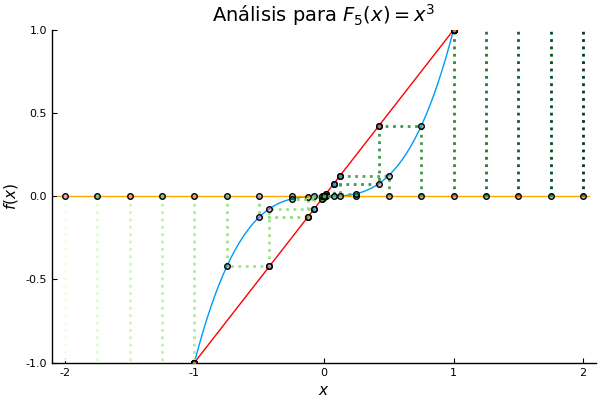

In [41]:
F₅(x) = x^3
número_iteraciones = 5
a = -2.1; b = 2.1; paso = 0.01; c = -1; d = 1;
título = "Análisis para \$ F_5(x) = x^3 \$"

x0 = -2:1/4:2 |> collect
colores = [colormap("Greens", 2*17)[2*i] for i in 1:17]

análisis_gráfico(F₅, número_iteraciones, x0, a, b, paso, c, d, title = título, colors = colores)

Se observan cosas similares al ejemplo anterior, salvo que en este caso las órbitas con puntos iniciales positivos y negativos son distintas. Se observan que los puntos fijos son $x_0 = 0, \pm 1$ a diferencia del ejemplo anterior. Se mantienen el dominio de convergencia y el punto de la misma: cero, así como los puntos de periodo uno. Además, se mantiene la divergencia fuera de los casos anteriores, aunque en el caso de tenerse condiciones iniciales negativas, la divergencia es hacia menos infinito.

3. $F_6(x) = -x^3$:

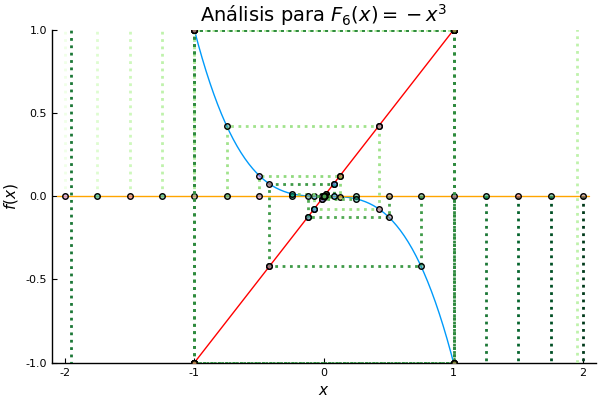

In [42]:
F₆(x) = -x^3
número_iteraciones = 5
a = -2.1; b = 2.1; paso = 0.01; c = -1; d = 1;
título = "Análisis para \$ F_6(x) = -x^3 \$"

x0 = -2:1/4:2 |> collect
colores = [colormap("Greens", 2*17)[2*i] for i in 1:17]

análisis_gráfico(F₆, número_iteraciones, x0, a, b, paso, c, d, title = título, colors = colores)

Se observa que los dominios de convergencia o periodicidad, modificando ligeramente los argumentos anteriores usando valores absolutos, se mantienen iguales en el caso de converger o tenerse órbitas de periodo uno. El caso de la divergencia, sin embargo, se vuelve más complejo dado que no existe la "convergencia a más/menos infinito" sino una sucesión alternante entre números negativos y positivos de valor absoluto cada vez mayor. Este comportamiento de oscilación de signo, sin embargo, también se observa en los dominios de convergencia o periodicidada, aunque el valor absoluto de los iterados se mantienen ya sea constante, en el caso de la periodicidad o decreciente en el caso de la convergencia.

## 7

Analicen los mapeos

- F(x) = x,

- F(x) = -x,

- F(x) = x-x^2,

que se satisface $F(0) = 0$ y $|F'(0)| = 1$. (Este tipo de puntos son *neutralmente* atractivos o repulsivos.) ¿Qué podemos decir de la convergencia?

Un texto en el que se puede leer la clasificación con mayor cuidado es [este](https://math.la.asu.edu/~dummit/docs/dynamics_1_introduction_to_dynamics.pdf).

1. $F_7(x) = x$

Se tiene que $F_7'(x) = 1 \implies |F_7'(x)| = 1$. Como todo punto del dominio es fijo, en particular, todo punto es un punto neutro.

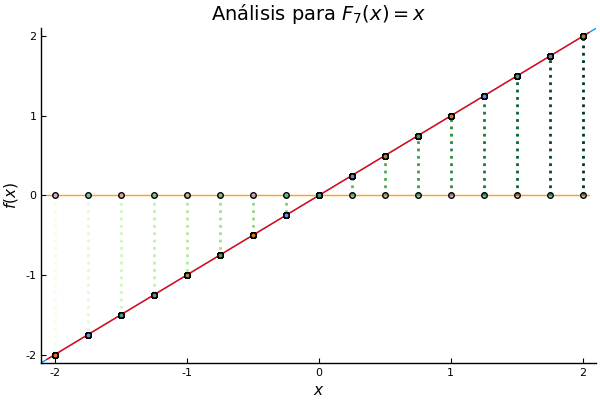

In [43]:
# Definiendo la función y realizando el análisis

F₇(x) = x 
número_iteraciones = 5
a = -2.1; b = 2.1; paso = 0.01; c = -2.1; d = 2.1;
título = "Análisis para \$ F_7(x) = x \$"

x0 = -2:1/4:2 |> collect
colores = [colormap("Greens", 2*17)[2*i] for i in 1:17]

análisis_gráfico(F₇, número_iteraciones, x0, a, b, paso, c, d, title = título, colors = colores)

En efecto, todos los puntos son puntos fijos. El dominio de convergencia es infinito. En este sentido, todos los puntos son tanto neutralmente atractivos (*weakly attractive*) como neutralmente repulsivos (*weakly repulsive*) dado que, "en promedio", ni atraen ni repelen órbitas cercanas.

2. $F_8(x) = -x$

Se tiene que $F_8'(x) = -1 \implies F_8'(0) = -1$. El único punto fijo del mapeo es cero, por lo que conviene realizar el análisis en torno al origen.

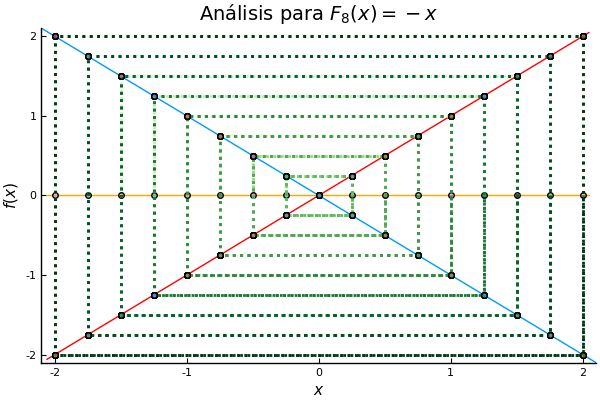

In [44]:
# Definiendo la función y realizando el análisis

F₈(x) = -x 
número_iteraciones = 5
a = -2.1; b = 2.1; paso = 0.01; c = -2.1; d = 2.1;
título = "Análisis para \$ F_8(x) = -x \$"

x0 = -2:1/4:2 |> collect
colores = [colormap("Greens", 2*17)[2*i] for i in 1:17]

análisis_gráfico(F₈, número_iteraciones, x0, a, b, paso, c, d, title = título, colors = colores)

Como $F_8^2(x) = -(-x) = x$, todos los puntos son de periodo dos, por lo que en efecto la única órbita convergente es la generada por cero. Esto indica que cero es un punto neutralmente repulsivo (basta tomar un intervalo $I$ que contenga al cero y que sea asimétrico para ver que el siguiente iterado del punto fuera de la "zona simétrica" se sale de dicho intervalo.)

3. $F_9(x) = x - x^2$

Se tiene que $F_9'(x) = 1 - 2x \implies F_9'(0) = 1$. Como $F_9(x) = x - x^2 = x \iff x^2 = 0$, el único punto fijo es el cero, por lo que conviene hacer el análisis en torno a este punto.

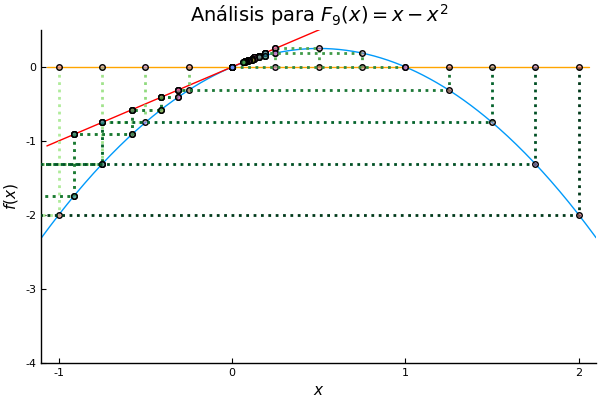

In [45]:
# Definiendo la función y realizando el análisis

F₉(x) = x - x^2 
número_iteraciones = 10
a = -1.1; b = 2.1; paso = 0.01; c = -4; d = 0.5;
título = "Análisis para \$ F_9(x) = x - x^2 \$"

x0 = -2:1/4:2 |> collect
colores = [colormap("Greens", 2*17)[2*i] for i in 1:17]

análisis_gráfico(F₉, número_iteraciones, x0, a, b, paso, c, d, title = título, colors = colores)

Se observa que el del lado izquierdo al cero, las órbitas divergen a menos infinito, mientras que del lado derecho, las órbitas convergen a cero si su condición inicial es menor a uno. En el caso de uno, el punto genera una órbita eventualmente periódica de periodo uno en cero. Fuera de esta región, las órbitas divergen a menos infinito. Esto implica que $x_0 = 0$ es un punto neutralmente repulsivo a la izquierda y neutralmente atractivo a la derecha. Resulta interesante que haya un cambio de comportamiento sobre la convergencia de las órbitas en un punto que no es fijo.

## 8

En el ejercicio 3, implementaron el análisis gráfico (y el método de Newton) para encontrar los puntos de periodo dos del mapeo $F(x) = x^2 -1.1$. Usen el módulo de duales para mostrar la estabilidad de esos puntos.

Redefiniendo a $F_3(x) = x^2 - 1.1$, se puede usar la función `función_iterar` para calcular la iteración "simbólica" de $F_3(x)$, $F_3^2(x)$:

In [46]:
F₃(x) = x^2 - 1.1 
F₃_iteración_2 = función_iterar(F₃, 2)

#16 (generic function with 1 method)

Los puntos fijos de $F_3$ están dados por:

In [47]:
puntos_fijos

2-element Array{Float64,1}:
 -0.6618950038622251
  1.661895003862225 

In [48]:
F₃.(puntos_fijos)

2-element Array{Float64,1}:
 -0.6618950038622251
  1.661895003862225 

Además, los puntos de periodo dos están dados por:

In [49]:
puntos_periodo_2_F₃

4-element Array{Float64,1}:
 -1.0916079783099617
 -0.6618950038622251
  0.0916079783099616
  1.661895003862225 

In [50]:
F₃.(puntos_periodo_2_F₃)

4-element Array{Float64,1}:
  0.0916079783099617
 -0.6618950038622251
 -1.0916079783099617
  1.661895003862225 

Usando la función `derivada_dual` del modulo de duales:

In [51]:
derivada_F₃_iteración_2 = x -> derivada_dual(F₃_iteración_2, x)

#58 (generic function with 1 method)

Se tiene:

In [52]:
derivada_F₃_iteración_2.(puntos_periodo_2_F₃)

4-element Array{Float64,1}:
 -0.40000000000000047
  1.7524199845511    
 -0.4                
 11.0475800154489    

Por lo que los puntos que son parte de la misma órbita de periodo dos, distintos a los puntos fijos, tienen (casi) la misma derivada y son puntos periódicos atractores (al ser la magnitud de su derivada menor a uno). Los demás puntos fijos son puntos fijos repulsores (al ser la magnitud de sus derivadas mayor a uno).